# Central fixed point stability

$$\lambda^* = \frac{R}{R-1} \bigg[ A\Lambda_2 \left(R, \frac{\mu_0 - \mu_1}{\sqrt{R}} + \sqrt{R}\mu_1, \sqrt{\frac{\sigma_0^2-\sigma_1^2}{R} + \sigma_1^2} \right) 
    + B\Lambda_1 \left(R, \frac{\mu_0 - \mu_1}{\sqrt{R}} + \sqrt{R}\mu_1, \sqrt{\frac{\sigma_0^2 -\sigma_1^2}{R} + \sigma_1^2} \right) + C/R \bigg]$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from disp import set_plot


DX = .0005
X_MIN, X_MAX = -20, 20
X = np.linspace(X_MIN, X_MAX, int((X_MAX-X_MIN)/DX)+1)

def norm(x, mu, sgm):
    return stats.norm.pdf(x, loc=mu, scale=sgm)

def phi(x, mu, sgm):
    return stats.norm.cdf(x, loc=mu, scale=sgm)

def lam_2(r, mu, sgm):
    return DX*np.sum(X**2*norm(X, mu, sgm)*phi(X, mu, sgm)**(r-1))

def lam_1(r, mu, sgm):
    return DX*np.sum(X*norm(X, mu, sgm)*phi(X, mu, sgm)**(r-1))

def get_lam_star(r, mu_0, mu_1, sgm_0, sgm_1):
    a = np.sqrt(r)*(mu_0 - mu_1)
    b = np.sqrt(r)*mu_1
    c = sgm_0**2 - sgm_1**2
    d = sgm_1**2
    
    mu_star = a/r + b
    v_star = c/r + d
    
    aa = c/(2*(c/r + d)**2)
    bb = (a*d - b*c)/(c/r + d)**2
    cc = (b**2*c - a**2*c/r**2 - 2*a**2*d/r - 2*a*b*d - c**2/r - c*d)/(2*(c/r + d)**2)
    
    return r/(r-1) * (aa * lam_2(r, mu_star, np.sqrt(v_star)) + bb * lam_1(r, mu_star, np.sqrt(v_star)) + cc/r)

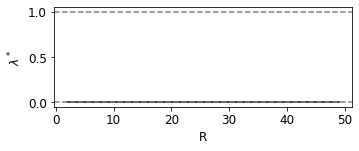

In [34]:
# lam star vs R
rs = np.arange(2, 50)
sgm_0 = 1
sgm_1 = 1
mu_0 = 0
mu_1 = 0

lam_stars = np.nan * np.zeros(len(rs))
for cr, r in enumerate(rs):
    lam_stars[cr] = get_lam_star(r, mu_0, mu_1, sgm_0, sgm_1)
    
fig, ax = plt.subplots(1, 1, figsize=(5.2, 2.2), tight_layout=True)

ax.plot(rs, lam_stars, lw=1.5, c='k')
ax.axhline(0, color='gray', ls='--')
ax.axhline(1, color='gray', ls='--')
set_plot(ax, x_label='R', y_label=r'$\lambda^*$', font_size=12)